# WEEK 06 - Algorithms II

## Learning objectives

- Consolidating concepts of algorithmic implementation as well as procedural programming
- Getting comfortable implementing real-world algorithms using Python
- Getting familiar with one of the most important algorithms of all time: Fourier transform

## Overview

In this tutorial, I am going to discuss one of the most important algorithms of all time and one of my personal favorite algorithms: The Fourier transform. For those of you who are not familiar with the in-depth workings of the Fourier analysis or need a freshening up in your knowledge, we are going to describe the algorithm ground up, starting with the Fourier series and the continuous integral formulation and moving to the discrete Fourier transform, which is more suitable to computation, and for those who are more experienced with the basics, we are going to delve into the details of the implementation of the discrete Fourier transform as well as the extremely important fast Fourier transform (FFT).

## The Fourier series

The Fourier series is a good entry point to Fourier analysis, and essentially rewrites a periodic function using an infinite series of sines and cosines of increasingly higher frequencies. Let us unpack that statement. The function $f(x)$ to be rewritten has to be periodic over a given domain, meaning that it would repeat infinitely in both directions. We are going to see later how the Fourier transform is essentially a way to overcome this limitation.

Given a real-valued function $f(x)$, periodic between $-\pi$ and $\pi$, the Fourier series can be written as

\begin{equation}
f(x) = \sum_{k=-\infty}^{\infty} a_{k} \text{cos}(kx) + b_{k}\text{sin}(kx),
\end{equation}

where the coefficients $a_{k}$ and $b_{k}$ can be computed using

\begin{equation}
a_{k} = \frac{1}{||\text{cos}(kx)||^{2}} <f(x), \text{cos}(kx)> = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \text{cos}(kx) dx,
\end{equation}

\begin{equation}
b_{k} = \frac{1}{||\text{sin}(kx)||^{2}} <f(x), \text{sin}(kx)> = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \text{sin}(kx) dx,
\end{equation}

where $<f(x), g(x)> := \int_{a}^{b} f(x)g(x) dx$ is the inner product of functions $f(x)$ and $g(x)$ and $||g(x)|| = \int_{a}^{b} g(x) dx$ is the norm of function $g(x)$. Note how the Fourier series can be seen as a change of basis to the infinite-dimensional space of orthogonal bases $\text{sin}(kx)$ and $\text{cos}(kx)$. Convince yourself that $\text{sin}(kx)$ and $\text{cos}(kx)$ form an orthogonal basis $\psi_{k}$, i.e., $<\psi_{i}, \psi_{j}> = 0 \; \forall \; i \ne j$. Given that $\text{cos}$ and $\text{sin}$ are even and odd functions, respectively, the Fourier series can be written as

\begin{equation}
f(x) = \frac{a_{0}}{2} + \sum_{k=1}^{\infty} a_{k} \text{cos}(kx) + b_{k}\text{sin}(kx),
\end{equation}

where the coefficients $a_{k}$ and $b_{k}$ can be computed using

\begin{equation}
a_{k} = \frac{1}{||\text{cos}(kx)||^{2}} <f(x), \text{cos}(kx)> = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \text{cos}(kx) dx,
\end{equation}

\begin{equation}
b_{k} = \frac{1}{||\text{sin}(kx)||^{2}} <f(x), \text{sin}(kx)> = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \text{sin}(kx) dx,
\end{equation}

You may have already noticed traces of Euler's formula and complex numbers creeping in by looking at the form of the Fourier series above, and it is indeed natural to write the Fourier series for complex-valued functions. The Fourier series can be written more generally for a complex L-periodic function $f(x)$ as

\begin{equation}
f(x) = \sum_{k = -\infty}^{\infty} c_{k} e^{\frac{ik 2 \pi x}{L}},
\end{equation}

where the complex Fourier coefficients $c_{k}$ are given as

\begin{equation}
c_{k} = \frac{1}{L}<f(x), \psi_{k}> = \frac{1}{L}\int_{0}^{L}f(x)e^{\frac{-ik 2\pi x}{L}}dx.
\end{equation}

Note that $e^{\frac{ik \pi x}{L}} = \text{cos}(\frac{k \pi x}{L}) + i\text{sin}(\frac{k \pi x}{L})$ using Euler's formula.

Convince yourself that the functions $\psi_{k} = e^{\frac{-ik 2\pi x}{L}}$ form an orthogonal basis, i.e., $<\psi_{i}, \psi_{j}> = 0 \; \forall \; i \ne j$.

We are going to code up the Fourier series. However, before we can do that there two hurdles that have to be addressed. First, are the infinity signs in the summation above. Computers do not like infinity; therefore, we will curtail the infinite series up to a given accuracy. This truncation leads to the Fourier series **approximation**, and we will see that the approximation becomes more accurate as we add higher and higher frequencies to our finite series. The second issue is the computation of the integral for the Fourier coefficients, which needs to be done numerically. Here, we will simply use the trapezoidal rule.

**Hints**:

- The function we are going to use as an example is a simple hat function, which is real valued; therefore, you can use the real version of the Fourier series above in order to simplify your computations
- Furthermore, since we are going to necessarily truncate the series up to a given number of frequencies, it helps to use the version that rewrites the series from $0-\infty$ instead of the original $-\infty-\infty$
- Use the trapezoidal rule to calculate the integral simply as $\int_{0}^{L} f(x) dx \approx \sum_{n = 0}^{N - 1} f(x_{i}) \Delta x$, where $x_{i}$ are discrete locations over the integration domain, spaced $\Delta x$ apart from each other

In [2]:
%matplotlib inline

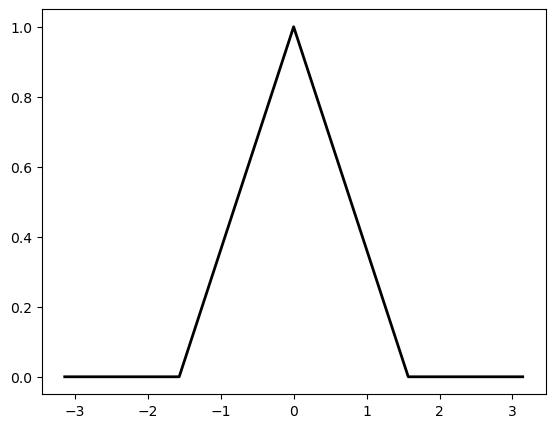

In [3]:
import math
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.5,5))

# Sampling resolution
dx = 0.001
# Data length
n = int(2 * math.pi / dx)
# Sampling points
x = [-1 * math.pi + i * dx for i in range(0, n)]
hat_length = int(n/4)

# Create hat function
f = [0] * n
f[hat_length: 2 * hat_length] = [(4/n) * i for i in range(0, hat_length)]
f[2 * hat_length: 3 * hat_length] = [1 - (4/n) * i for i in range(0, hat_length)]
# Plot hat function
ax.plot(x, f, '-', color = "black", linewidth = 2)


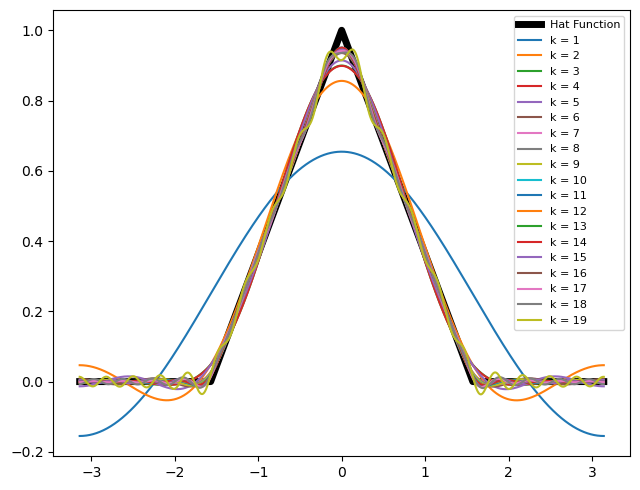

In [5]:
"""
Your task is to implement the Fourier series and compute it for the hat function, defined above.
""";

def compute_fs(n_fs, f):
    # The approximate Fourier series
    fs = 0.
    # initialize list to store the fs value for plotting
    fs_list = [0.0] * len(x)
    # Fourier coefficients
    A = [0] * n_fs
    B = [0] * n_fs
    # Define the resolution of the discretization
    n_res = 25
    # Define the step size
    idx = int(len(f)/n_res)
    # Define the maximum and minimum range
    T = max(x) - min(x)
    # Compute A0
    sum_A0 = 0
    for i in range(0, len(x)-1, idx):
        sum_A0 += (2 / T) * f[i] * (T / n_res) # code here
    A[0] = sum_A0
    # Note that B[0] is equal to zero
    # Add A[0] to the approximate Fourier series
    fs_list = [A[0]/2] * len(x) # Code 
    # Compute the Fourier coefficients
    for k in range(1, n_fs):
        sum_cos = 0.0
        sum_sin = 0.0
        for j in range(0, len(f)-1, idx):
            sum_cos += f[j] * math.cos(2 * math.pi * x[j] * k / T)
            sum_sin += f[j] * math.sin(2 * math.pi * x[j] * k / T)
        # Compute A[k]
        A[k] = (2 / T) * sum_cos * (T / n_res) # Code here
        # Compute B[k]
        B[k] = (2 / T) * sum_sin * (T / n_res) # Code here
        """print("-----------------------")
        print(f"For value k of {k}: ")
        print(f"A[k] = {A[k]}")
        print(f"B[k] = {B[k]}")
        print("-----------------------")"""
        # Update Fourier series
        for j in range(len(x)):
            fs_list[j] += A[k] * math.cos(2 * math.pi * x[j] * k / T) + B[k] * math.sin(2 * math.pi * x[j] * k / T)
        #fs += # Code here
        # Plot Fourier series up to coefficient k
        ax.plot(x, fs_list, label = f"k = {k}")
    
    ax.legend(fontsize = 8)
    plt.tight_layout()

    return A, B, fs_list

# The length of the approximate Fourier series
n_fs = 20
# Create figure
fig, ax = plt.subplots(figsize=(6.5,5))
# Plot hat function
ax.plot(x, f, '-', color = "black", linewidth = 5, label = "Hat Function")
# Compute the Fourier series and plot it
A, B, fs_list = compute_fs(n_fs, f)

Try to answer the following questions:

- What happens as the series becomes larger, i.e., as you add more sines and cosines?
- Where is the series most and least accurate?
- Do you observe a similar pattern for the inaccuracies?

Your next task is to look at the Fourier coefficients you just computed. Remember that a given coefficient $c_{k}$ determines *how much* of the $k$-th frequency is added to the Fourier signal. Intuitively, this feeds well into the notion of projection and change of basis in the sense that the *closer* the original signal is to a given frequency, the dot product between them and, consequently, the corresponding Fourier coefficient would be larger.

Text(0.5, 0, 'K-th Frequency')

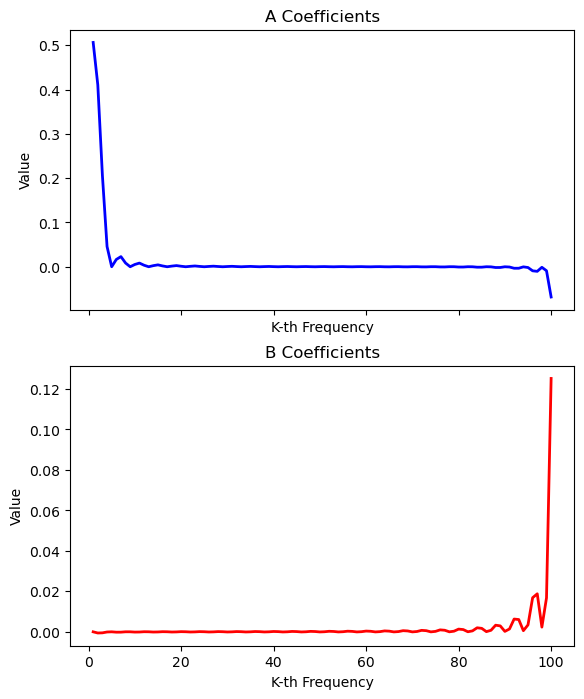

In [126]:
"""
Your task is to plot the Fourier coefficients computed above
""";

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 8), sharex=True)

# Code here
x_axis = list(range(1, n_fs + 1))
ax1.plot(x_axis, A, '-', color = "Blue", linewidth = 2, label = "A coefficient")
ax1.set_title("A Coefficients")
ax1.set_ylabel("Value")
ax1.set_xlabel("K-th Frequency")

ax2.plot(x_axis, B, '-', color = "Red", linewidth = 2, label = "B coefficient")
ax2.set_title("B Coefficients")
ax2.set_ylabel("Value")
ax2.set_xlabel("K-th Frequency")


Try to answer the following questions:

- How do the coefficients evolve?
- Is there a pattern to what you observe?

Copyright 2024 &copy; Manuel Saberi, High Performance Computing, Ruhr University Bochum. All rights reserved. No part of this notebook may be reproduced, distributed, or transmitted in any form or by any means, including photocopying, recording, or other electronic or mechanical methods, without the prior written permission of the publisher.